In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

My score was 46%. I was more optimistic than reality. I would like to know more about the question 'What is the life expectancy of the world population?'

The life expectancy had increased drastically between 1950s to 1970s and it has been steadily growing with the advancement in biology

In [2]:
life_expectancy = pd.read_csv('../data/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
life_expectancy_m = pd.read_csv('../data/ddf--datapoints--life_expectancy_male--by--geo--time.csv')
life_expectancy_f = pd.read_csv('../data/ddf--datapoints--life_expectancy_female--by--geo--time.csv')

life_expectancy = life_expectancy.groupby('time').mean().reset_index()
life_expectancy_m = life_expectancy_m.groupby('time').mean().reset_index()
life_expectancy_f = life_expectancy_f.groupby('time').mean().reset_index()

life_expectancy = pd.merge(life_expectancy, life_expectancy_m, on='time', how='outer')
life_expectancy = pd.merge(life_expectancy, life_expectancy_f, on='time', how='outer')

life_expectancy.head()

,time,life_expectancy_years,life_expectancy_male,life_expectancy_female
0,1800,31.486020,NaN,NaN
1,1801,31.448905,NaN,NaN
2,1802,31.463483,NaN,NaN
3,1803,31.377413,NaN,NaN
4,1804,31.446318,NaN,NaN


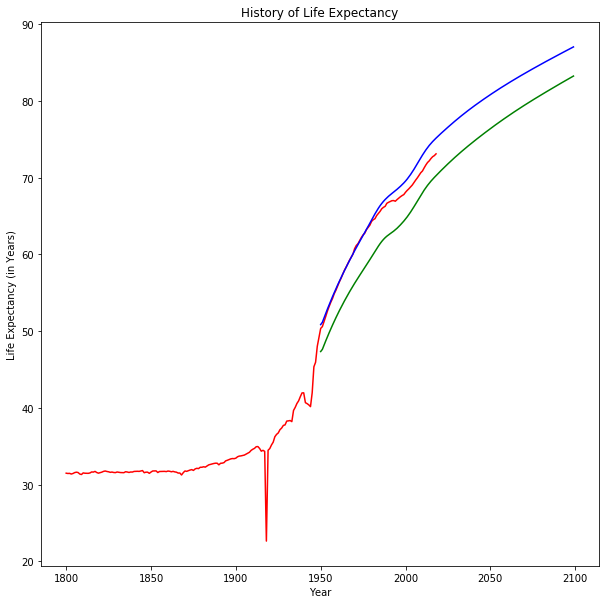

In [3]:
plt.figure(figsize=(10,10))
plt.plot(life_expectancy['time'].values, life_expectancy['life_expectancy_years'], '-r')
plt.plot(life_expectancy['time'].values, life_expectancy['life_expectancy_male'], '-g')
plt.plot(life_expectancy['time'].values, life_expectancy['life_expectancy_female'], '-b')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (in Years)')
plt.title('History of Life Expectancy')
plt.show()

# Problem 2

Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution of income changes over time.

The distribution becomes long tailed on right which indicates over all income growth for all continents

In [4]:
gdp_capita_df = pd.read_csv("../data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
country = pd.read_csv('../data/ddf--entities--geo--country.csv')[['country', 'world_4region']]
gdp_continent = pd.merge(gdp_capita_df, country, left_on = 'geo', right_on='country')

In [5]:
gdp_continent.head()

,geo,time,gdppercapita_us_inflation_adjusted,country,world_4region
0,abw,2010,24271.94042,abw,americas
1,afg,2002,364.57057,afg,asia
2,afg,2003,376.75871,afg,asia
3,afg,2004,364.09544,afg,asia
4,afg,2005,389.41636,afg,asia


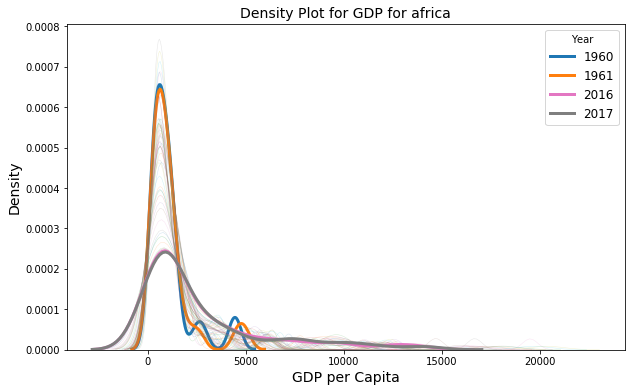

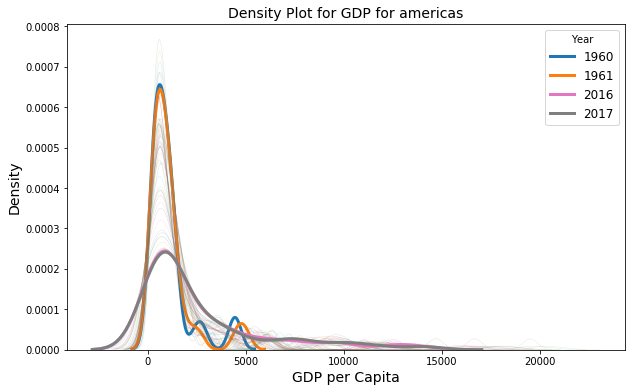

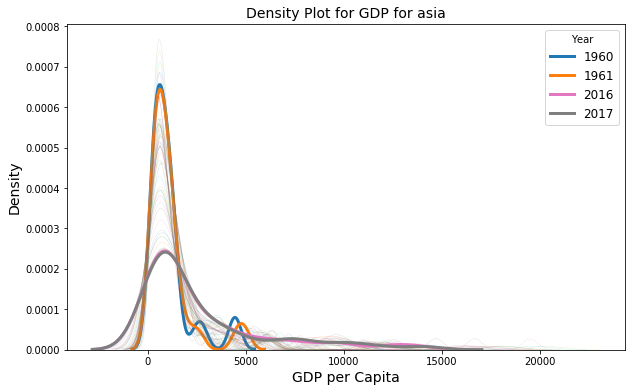

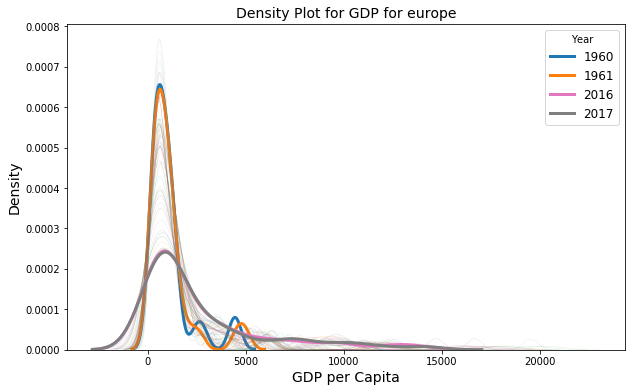

In [6]:
years = np.unique(gdp_continent['time'])

for i,c in enumerate(np.unique(gdp_continent['world_4region'])):
    plt.figure(figsize=(10,6))
    for year in years:
        subset = gdp_continent[(gdp_continent['time'] == year) & (gdp_continent['world_4region'] == 'africa')]
        if year < 1962 or year > 2015:
            width = 3
            alpha = 1
            l = year
        else:
            width = 0.5
            alpha=0.2
            l='_nolegend_'
        sns.distplot(subset['gdppercapita_us_inflation_adjusted'], hist = False, kde = True,
                     kde_kws = {'linewidth': width, 'alpha': alpha},
                     label = l)
    plt.legend(prop={'size': 12}, title = 'Year')
    plt.title('Density Plot for GDP for ' + c, fontsize=14)
    plt.xlabel('GDP per Capita', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()

# Problem 3:

Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child mortality over time. How does each measure change over time within each continent? Interpret your visualizations, noting any trends and/or outliers.

Child mortality and life expectancy is inversely proportional as expected and there is strong inverse relationship between child mortality and GDP which makes sense. 
For every continent the  child mortality has gone down and life expectancy has gone up over time. Africa being one of the prime winners.
The GDP has been rising for all continents but Africa is the weakest and the gap between the growth is significant between EU v/s everyone else.

In [7]:
life_expectency = pd.read_csv('../data/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
child_mortality = pd.read_csv('../data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
country = pd.read_csv('../data/ddf--entities--geo--country.csv')[['country', 'world_4region']]
q3 = pd.merge(child_mortality, life_expectency, on = ['geo', 'time']) 
q3 = pd.merge(q3, gdp_capita_df, on = ['geo', 'time'])
q3 = pd.merge(q3, country, left_on = 'geo', right_on='country')
continent = q3.groupby(['world_4region', 'time']).mean().reset_index()
colors = np.unique(continent['world_4region'])
q3.head()

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,life_expectancy_years,gdppercapita_us_inflation_adjusted,country,world_4region
0,abw,2010,17.969,75.06,24271.94042,abw,americas
1,afg,2002,122.200,52.43,364.57057,afg,asia
2,afg,2003,118.300,53.03,376.75871,afg,asia
3,afg,2004,114.400,53.50,364.09544,afg,asia
4,afg,2005,110.300,53.87,389.41636,afg,asia


In [8]:
q3_corr = q3[['child_mortality_0_5_year_olds_dying_per_1000_born', 'life_expectancy_years', 'gdppercapita_us_inflation_adjusted']].corr()
q3_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,child_mortality_0_5_year_olds_dying_per_1000_born,life_expectancy_years,gdppercapita_us_inflation_adjusted
child_mortality_0_5_year_olds_dying_per_1000_born,1,-0.901,-0.461
life_expectancy_years,-0.901,1,0.582
gdppercapita_us_inflation_adjusted,-0.461,0.582,1


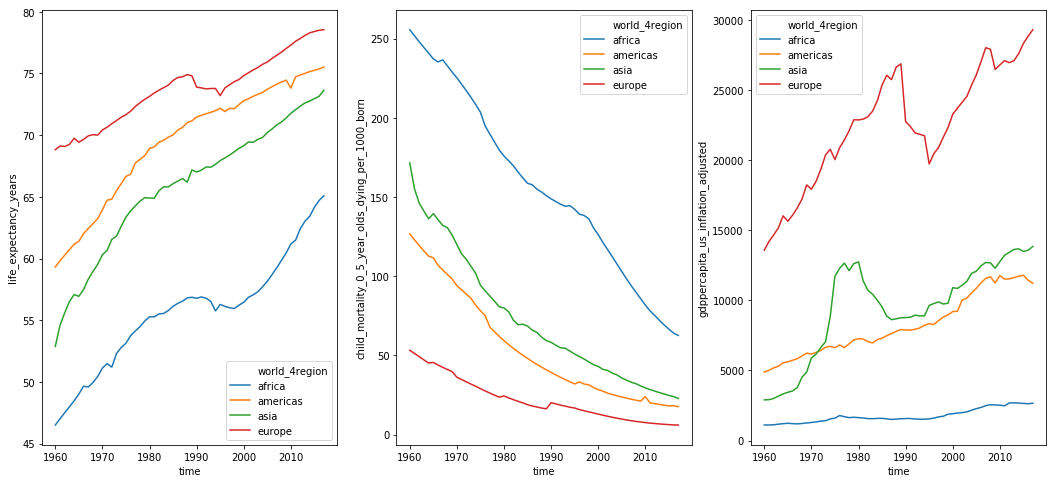

In [9]:
f, axes = plt.subplots(1, 3, figsize=(18,8))
# fig, ax = plt.subplots(figsize=(20, 10
sns.lineplot(y='life_expectancy_years', x= 'time', hue='world_4region', hue_order=colors, data=continent , ax=axes[0])
sns.lineplot(y='child_mortality_0_5_year_olds_dying_per_1000_born', x= 'time', hue='world_4region', hue_order=colors, data=continent , ax=axes[1])
sns.lineplot(y='gdppercapita_us_inflation_adjusted', x= 'time', hue='world_4region', hue_order=colors, data=continent , ax=axes[2])

# Problem 4
Choose two variables you have not investigated yet, and visualize their distributions, their relationship with each other, and how these change over time. Interpret your visualizations, noting any trends and/or outliers.

There is a very strong trend in the government spending per person and the GDP which makes sense as the GDP increases the government is able to invest more for its people.

In [10]:
spending = pd.read_csv('../data/ddf--datapoints--total_health_spending_per_person_international_dollar--by--geo--time.csv')
q4 = pd.merge(spending, gdp_capita_df, on = ['geo', 'time'])
q4_plot = q4.groupby('time').mean().reset_index()
## Normalizing to see trend more clearly
for col in ['total_health_spending_per_person_international_dollar', 'gdppercapita_us_inflation_adjusted']:
    q4_plot[col] = (q4_plot[col] - q4_plot[col].mean())/q4_plot[col].std()
q4_plot.head()

,time,total_health_spending_per_person_international_dollar,gdppercapita_us_inflation_adjusted
0,1995,-1.375390,-1.705371
1,1996,-1.230598,-1.512394
2,1997,-1.067717,-1.068741
3,1998,-0.926885,-0.930916
4,1999,-0.823571,-0.746056


In [11]:
q4_corr = q4[['gdppercapita_us_inflation_adjusted', 'total_health_spending_per_person_international_dollar']].corr()
q4_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,gdppercapita_us_inflation_adjusted,total_health_spending_per_person_international_dollar
gdppercapita_us_inflation_adjusted,1,0.886
total_health_spending_per_person_international_dollar,0.886,1


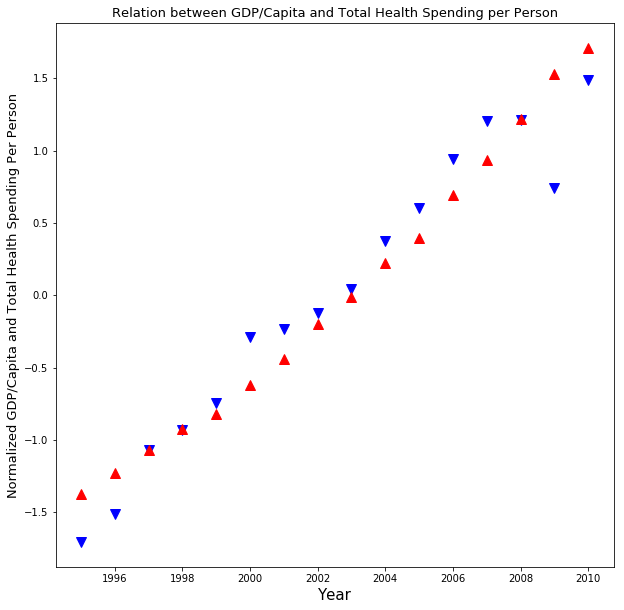

In [12]:
plt.figure(figsize=(10,10))
plt.plot(q4_plot['time'], q4_plot['gdppercapita_us_inflation_adjusted'], 'vb', markersize=10, alpha=1)
plt.plot(q4_plot['time'], q4_plot['total_health_spending_per_person_international_dollar'], '^r', alpha=1, markersize=10)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Normalized GDP/Capita and Total Health Spending Per Person', fontsize=13)
plt.title('Relation between GDP/Capita and Total Health Spending per Person', fontsize=13)
plt.show()

# Problem 5

Did you use static or interactive plots to answer the previous problems?

Explore the data using the interactive visualization tools at https://www.gapminder.org/tools, and watch the TED talk “The best stats you’ve ever seen” at https://www.youtube.com/watch?v=hVimVzgtD6w.

Discuss the advantages, disadvantages, and relative usefulness of using interactive/dynamic visualizations versus static visualizations.

I used static plots.